Try to use Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive
%rm -f -r mlmech
! git clone https://github.com/jfra1397/mlmech.git
%cd mlmech

In [ ]:
!git checkout main
!git pull

Training starts here

In [16]:
import custom
import create_model
from importlib import reload

In [17]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


img_dir = "images/"
mask_dir = "labels/"
image_extension = ".png"
mask_extension = ".png"
batch_size = 16
horizontal_split = 1#12
vertical_split = 1

train, validation = CustomDataGenerator.generate_data(batch_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed, single_img=single_img)
img_size = train.img_size
print(img_size)

Number of samples:  453
Classes: [0 1]
Number of samples:  51
Classes: [0 1]
(256, 3072, 3)


In [ ]:
train.plot_batch(3)

img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

In [3]:
reload(custom)
from custom import *

reload(create_model)
from create_model import generate_model

import tensorflow.keras.losses as losses

model = generate_model(img_size)

model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 3072, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 3072, 8) 224         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 3072, 8) 584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 1536, 8) 0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [4]:
reload(custom)
from custom import *

history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/50
20/20 [==============================] - 425s 21s/step - loss: 4.9736 - accuracy: 0.3422 - val_loss: 0.5268 - val_accuracy: 0.7531
Epoch 2/50
20/20 [==============================] - 380s 19s/step - loss: 0.5309 - accuracy: 0.7778 - val_loss: 0.3023 - val_accuracy: 0.8572
Epoch 3/50
20/20 [==============================] - 356s 18s/step - loss: 0.3492 - accuracy: 0.8353 - val_loss: 0.2061 - val_accuracy: 0.9031
Epoch 4/50
20/20 [==============================] - 352s 18s/step - loss: 0.2487 - accuracy: 0.9034 - val_loss: 0.1712 - val_accuracy: 0.9273
Epoch 5/50
20/20 [==============================] - 354s 18s/step - loss: 0.2010 - accuracy: 0.9358 - val_loss: 0.0960 - val_accuracy: 0.9725
Epoch 6/50
20/20 [==============================] - 354s 18s/step - loss: 0.1422 - accuracy: 0.9581 - val_loss: 0.1114 - val_accuracy: 0.9580
Epoch 7/50
20/20 [==============================] - 358s 18s/step - loss: 0.1316 - accuracy: 0.9585 - val_loss: 0.0884 - val_accuracy: 0.9776
Epoch 

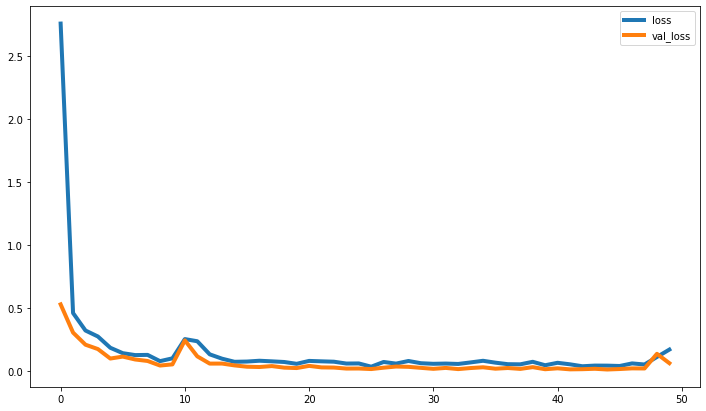

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

1/1 [==============================] - 4s 4s/step


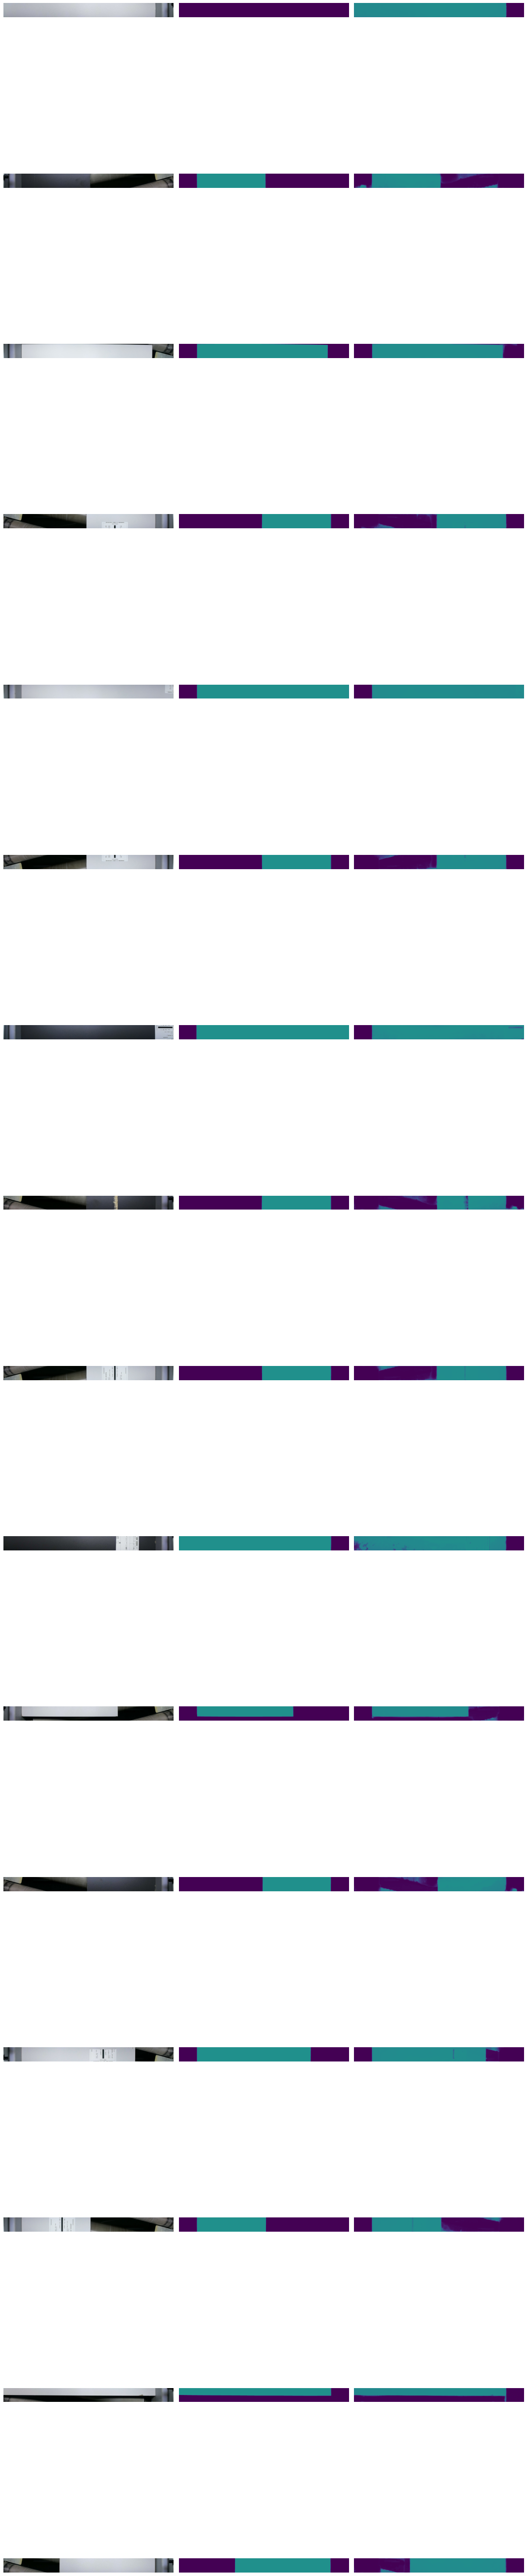

In [6]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)

In [7]:
reload(custom)
from custom import *

import pandas as pd
import os

os.mkdir(dir_name)

from shutil import copyfile
copyfile("custom.py", dir_name + "/custom.py")
copyfile("create_model.py", dir_name + "/create_model.py")


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = dir_name + '/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

#save model
model.save(dir_name + "/model.tf", include_optimizer = True)
model.save_weights(dir_name + "/weights.tf")

INFO:tensorflow:Assets written to: results/julian/unet_256x3072_3/model.tf/assets
